### Switch simulation data analysis ###

Importing simulation data

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

scenario_to_disp = "motor city scenario 2"
delays_df = pd.read_csv(scenario_to_disp+"/late_times.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

occup_df = pd.read_csv(scenario_to_disp+"/road_occupations.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

speeds_df = pd.read_csv(scenario_to_disp+"/speeds.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

waiting_df = pd.read_csv(scenario_to_disp+"/station_waiting_times.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

times_stamp  = delays_df["hour"].unique()
tp_modes = delays_df["transport_mode"].unique()
selected_tp_mode = "bus"

[{'label': 'bus delays at 9h00', 'mean': 41.528999999999996, 'med': 38.992, 'q1': 8.349, 'q3': 118.037, 'whislo': 0.7390000000000001, 'whishi': 118.037, 'fliers': []}]


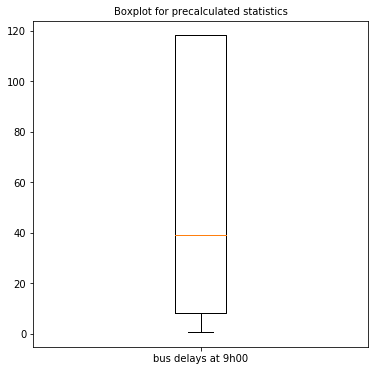

In [2]:
stats = [{
    "label" : selected_tp_mode+" delays at 9h00",
    "mean" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["mean delay"]),
    "med" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["median delay"]),
    "q1" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["1st quartile delay"]),
    "q3" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["third quartile delay"]),
    "whislo" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["min delay"]),
    "whishi" : float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == "09h00")]["max delay"]),
    "fliers": []  # required if showfliers=True
}]

print(stats)
fs = 10 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.bxp(stats)
axes.set_title('Boxplot for precalculated statistics', fontsize=fs)
plt.show()

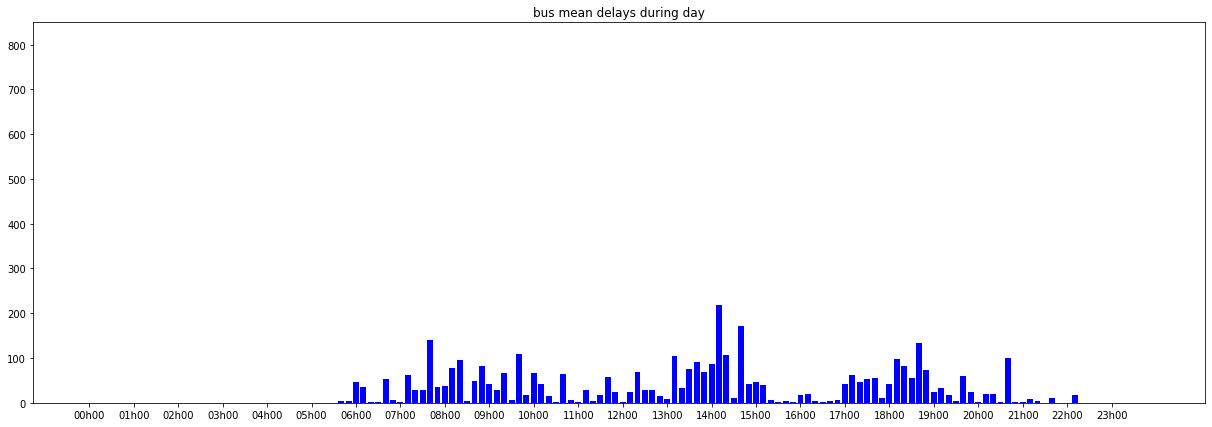

In [3]:
plt.figure(figsize=(21, 7))
time_stamp_to_disp = times_stamp[::6]
for hour in times_stamp:
    plt.bar(hour, float(delays_df[(delays_df["transport_mode"] == selected_tp_mode) & (delays_df["hour"] == hour)]["mean delay"]), color = "blue")
plt.xticks(time_stamp_to_disp) 
plt.title(selected_tp_mode+" mean delays during day")
plt.ylim((0,850))
plt.show()

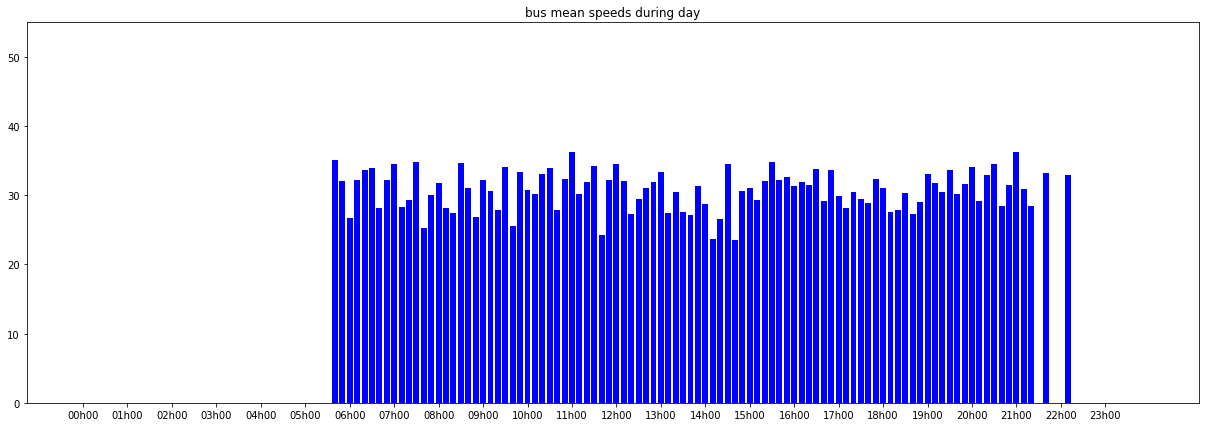

In [4]:
plt.figure(figsize=(21, 7))
for hour in times_stamp:
    plt.bar(hour, float(speeds_df[(speeds_df["transport_mode"] == selected_tp_mode) & (speeds_df["hour"] == hour)]["mean speed"]), color = "blue")
plt.xticks(time_stamp_to_disp) 
plt.title(selected_tp_mode+" mean speeds during day")
plt.ylim((0,55))
plt.show()

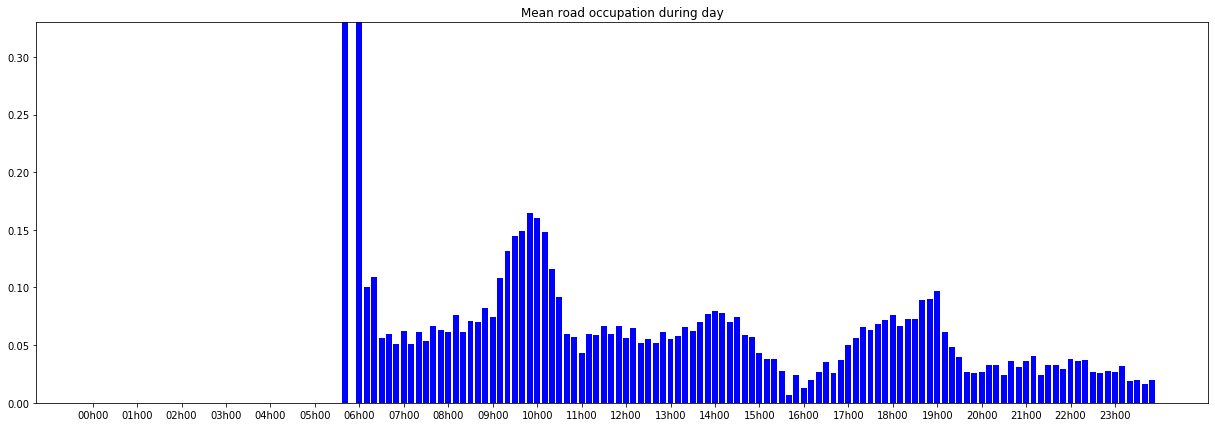

In [5]:
plt.figure(figsize=(21, 7))
for hour in times_stamp:
    plt.bar(hour, float(occup_df[occup_df["hour"] == hour]["mean road occupation"]), color = "blue")
plt.xticks(time_stamp_to_disp)  
plt.title("Mean road occupation during day")
plt.ylim((0,0.33))
plt.show()

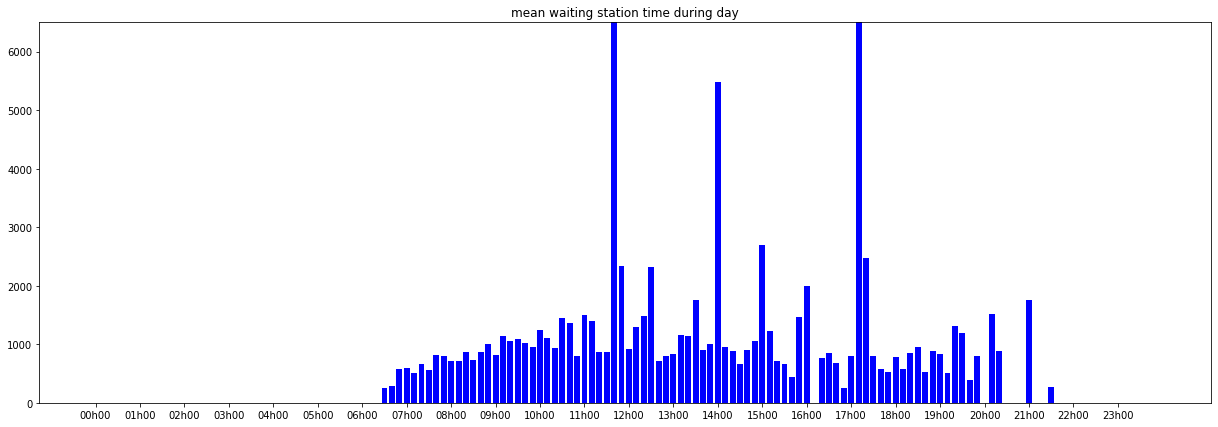

In [6]:
plt.figure(figsize=(21, 7))
for hour in times_stamp:
    plt.bar(hour, float(waiting_df[waiting_df["hour"] == hour]["mean waiting station time"]), color = "blue")
plt.xticks(time_stamp_to_disp)  
plt.title("mean waiting station time during day")
plt.ylim((0,6500))
plt.show()